# Title

#### Load the data

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paths to the CSV files
csv_file_paths = ['../data/benin-malanville.csv', '../data/sierraleone-bumbuna.csv', '../data/togo-dapaong_qc.csv']

# Dictionary to hold DataFrames
dataframes = {}

# Loop through each file path
for path in csv_file_paths:
    if os.path.exists(path):
        # Read the CSV file into a DataFrame
        dataframes[path] = pd.read_csv(path)
        print(f"Loaded {path} into DataFrame.")
    else:
        print(f"File not found: {path}")

# Now, `dataframes` contains each CSV file loaded as a DataFrame


Loaded ../data/benin-malanville.csv into DataFrame.
Loaded ../data/sierraleone-bumbuna.csv into DataFrame.
Loaded ../data/togo-dapaong_qc.csv into DataFrame.


In [3]:
benin_data = pd.read_csv('../data/benin-malanville.csv')
sierraleon_data = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo = pd.read_csv('../data/togo-dapaong_qc.csv')

### 1. Benin Site

* Lets explore the data

In [4]:
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
benin_data.shape

(525600, 19)

In [6]:
benin_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Check for null values

In [7]:
benin_data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Remove the comment column

In [8]:
benin_data.drop('Comments', axis=1, inplace=True)
benin_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

##### Data Exploration for Benin

In [9]:
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [10]:
benin_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


Drop Cleaning column

In [11]:
benin_data['Cleaning'].value_counts()

Cleaning
0    525115
1       485
Name: count, dtype: int64

Fixing the incorrect negative values of GHI, DNI & DHI

In [12]:
benin_clean_data = benin_data[(benin_data['GHI'] >= 0) & (benin_data['DNI'] >= 0) & (benin_data['DHI'] >=0)]
benin_clean_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000,246878.000000
mean,513.411100,356.480524,247.397346,501.775502,485.418619,31.271940,45.541173,2.802063,3.722219,0.587311,160.361394,11.926945,994.126139,0.001956,0.000860,47.396643,42.229899
std,304.765569,279.731019,143.420836,307.789277,298.429501,5.459802,27.015814,1.540762,1.898862,0.249724,95.546187,6.249953,2.637058,0.044188,0.030041,12.496610,10.599677
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.500000,8.400000
25%,239.000000,61.200000,141.200000,218.800000,211.800000,27.700000,18.800000,1.700000,2.400000,0.400000,76.500000,8.500000,992.000000,0.000000,0.000000,38.800000,34.900000
50%,520.300000,352.250000,227.800000,502.100000,484.900000,31.500000,44.600000,2.700000,3.600000,0.600000,161.300000,11.400000,994.000000,0.000000,0.000000,48.000000,42.400000
75%,790.000000,605.300000,336.200000,786.400000,757.700000,35.400000,68.100000,3.800000,4.900000,0.700000,240.900000,14.700000,996.000000,0.000000,0.000000,56.500000,49.600000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,16.000000,22.300000,3.400000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


Understanding the data distribution with histograms

array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'DNI'}>,
        <Axes: title={'center': 'DHI'}>,
        <Axes: title={'center': 'ModA'}>],
       [<Axes: title={'center': 'ModB'}>,
        <Axes: title={'center': 'Tamb'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'WS'}>],
       [<Axes: title={'center': 'WSgust'}>,
        <Axes: title={'center': 'WSstdev'}>,
        <Axes: title={'center': 'WD'}>,
        <Axes: title={'center': 'WDstdev'}>],
       [<Axes: title={'center': 'BP'}>,
        <Axes: title={'center': 'Cleaning'}>,
        <Axes: title={'center': 'Precipitation'}>,
        <Axes: title={'center': 'TModA'}>],
       [<Axes: title={'center': 'TModB'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

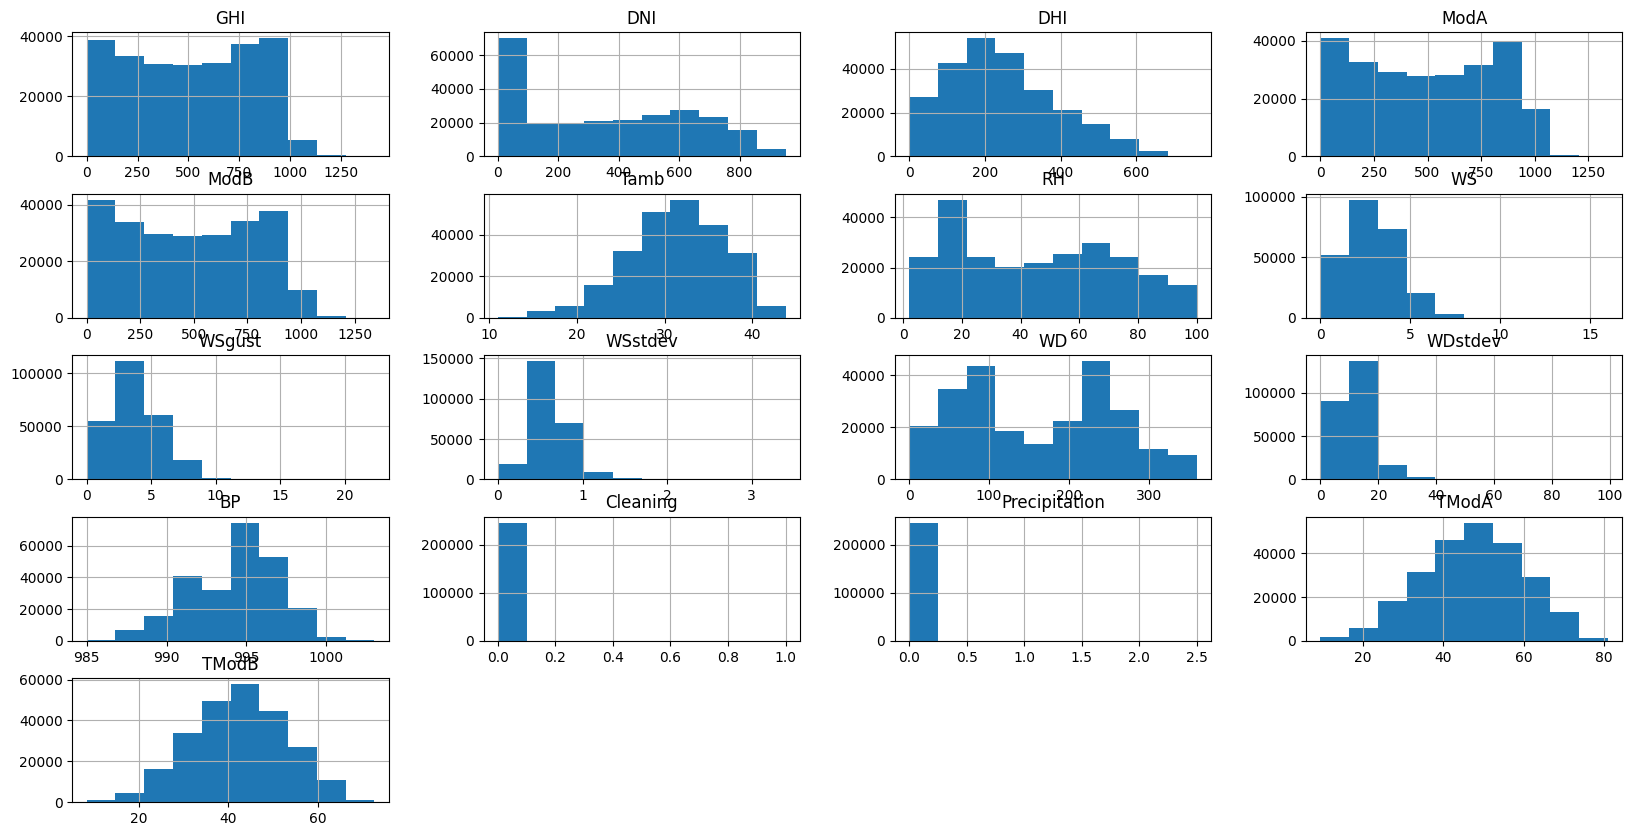

In [13]:
benin_clean_data.hist(figsize=(20,10))

##### Checking for outliers

<Axes: >

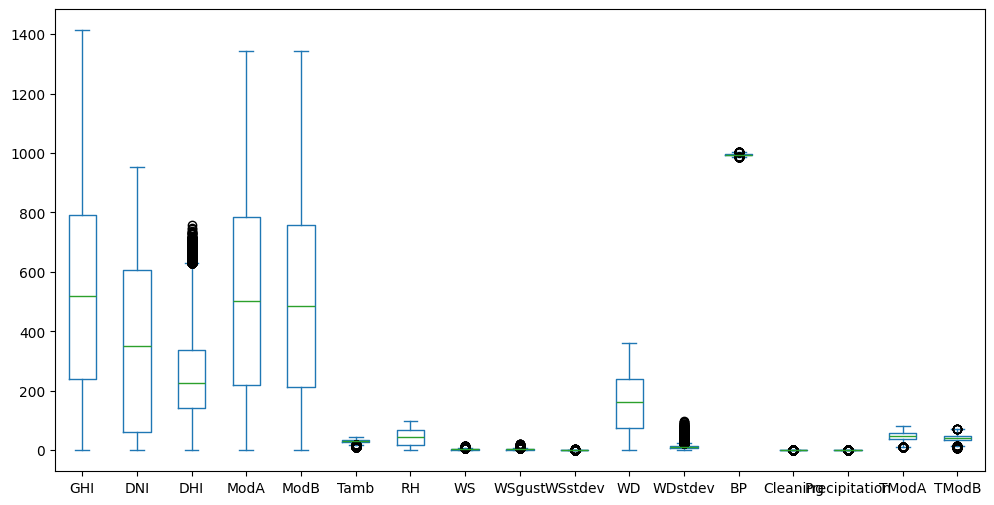

In [14]:
benin_clean_data.plot(kind='box', figsize=(12, 6))

Text(0.5, 1.0, 'Boxplot for ModA and ModB')

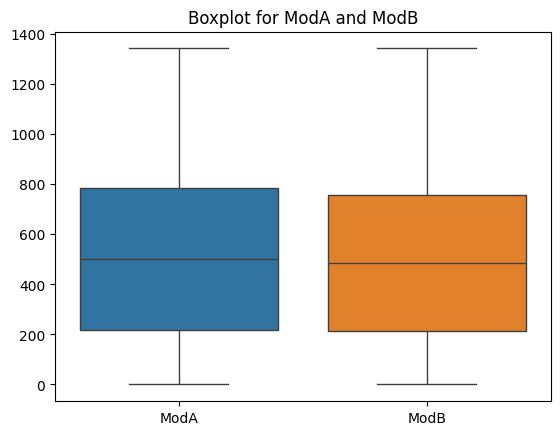

In [15]:
sns.boxplot(data=benin_clean_data[['ModA', 'ModB']])
plt.title("Boxplot for ModA and ModB")

Text(0.5, 1.0, 'Boxplot for WS and WSgust')

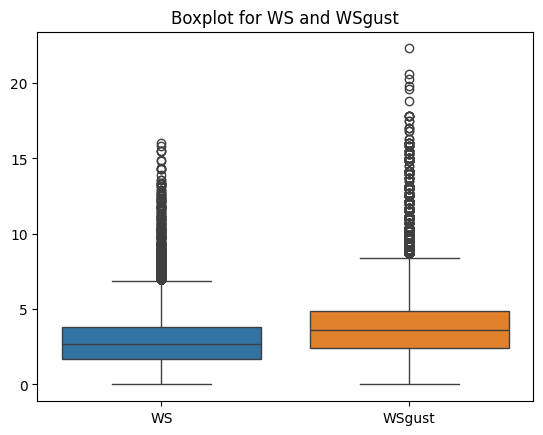

In [16]:
sns.boxplot(data=benin_clean_data[['WS', 'WSgust']])
plt.title("Boxplot for WS and WSgust")

In [17]:
Q1 = benin_clean_data[['WS', 'WSgust']].quantile(0.25)
Q3 = benin_clean_data[['WS', 'WSgust']].quantile(0.75)

IQR = Q3 - Q1

In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the data
beini_df_capped = benin_clean_data.copy()
beini_df_capped[['WS', 'WSgust']] = benin_clean_data[['WS', 'WSgust']].clip(lower=lower_bound, upper=upper_bound, axis=1)


In [ ]:
sns.boxplot(data=beini_df_capped[['WS', 'WSgust']])
plt.title("Boxplot for WS and WSgust After removing outliers")

In [ ]:
selected_columns = ['GHI', 'DNI'] 
sns.pairplot(beini_df_capped[selected_columns], hue='Cleaning')
plt.show()

KeyboardInterrupt: 